## Import

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

## Data Load

In [34]:
train = pd.read_csv("./train.csv")

In [35]:
X = train.drop(columns=['ID', 'MEDV'])
y = train['MEDV']

In [36]:
test = pd.read_csv("./test.csv")
test = test.drop(columns=['ID'])

## Column

* CRIM: 도시별 1인당 범죄율
* ZN: 25,000 피트를 초과하는 주거용 토지의 비율
* NDUS: 비상업 면적의 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 주택당 평균 방의 개수
* AGE: 1940년 이전에 건축된 자가주택의 비율
* DIS: 5개의 보스턴 고용 센터와의 거리
* RAD: 고속도로 접근성 지수
* TAX: 10,000달러당 재산세율
* PTRATIO: 도시별 교사와 학생 수 비율
* B: 마을의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값, 단위: 천달러)

## Check Data Tendency

### scatterplot matrix

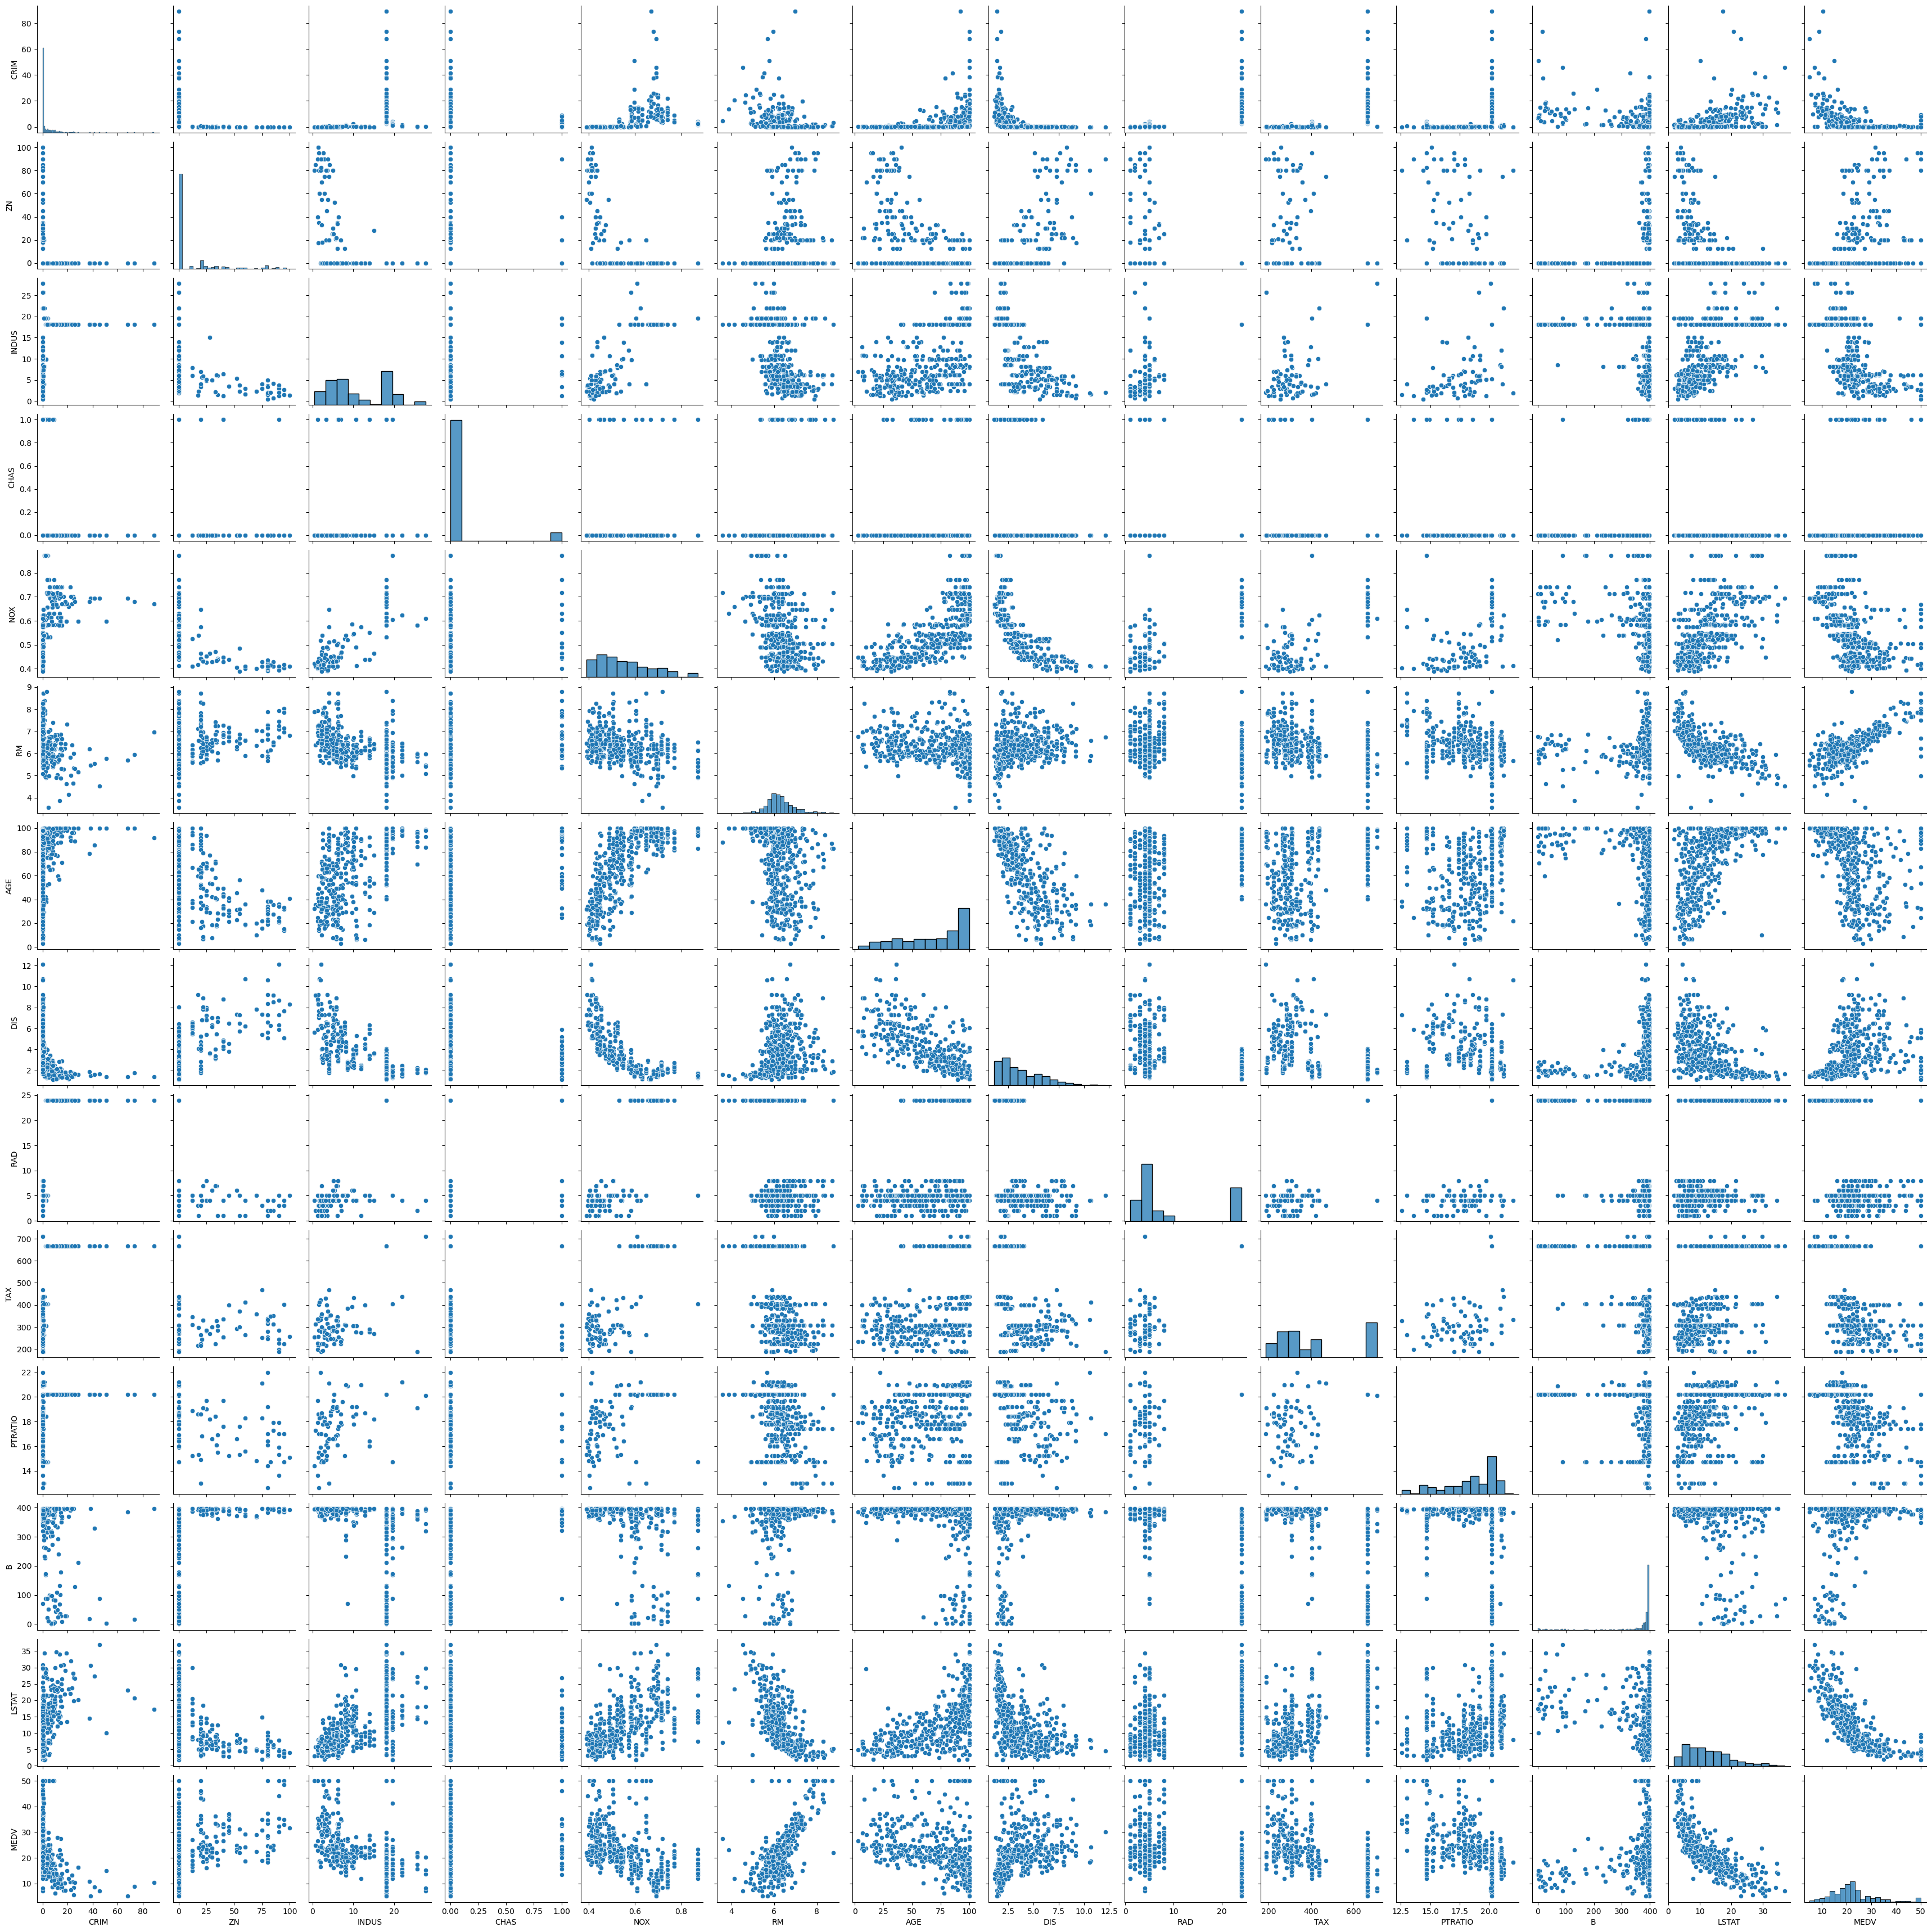

In [10]:
sns.pairplot(train, diag_kind="hist")
plt.show()

MEDV를 제외하고 13개의 칼럼이 존재하기 때문에, 데이터 경향성을 4개, 4개, 5개로 나눠서 확인하면 될 것 같다.

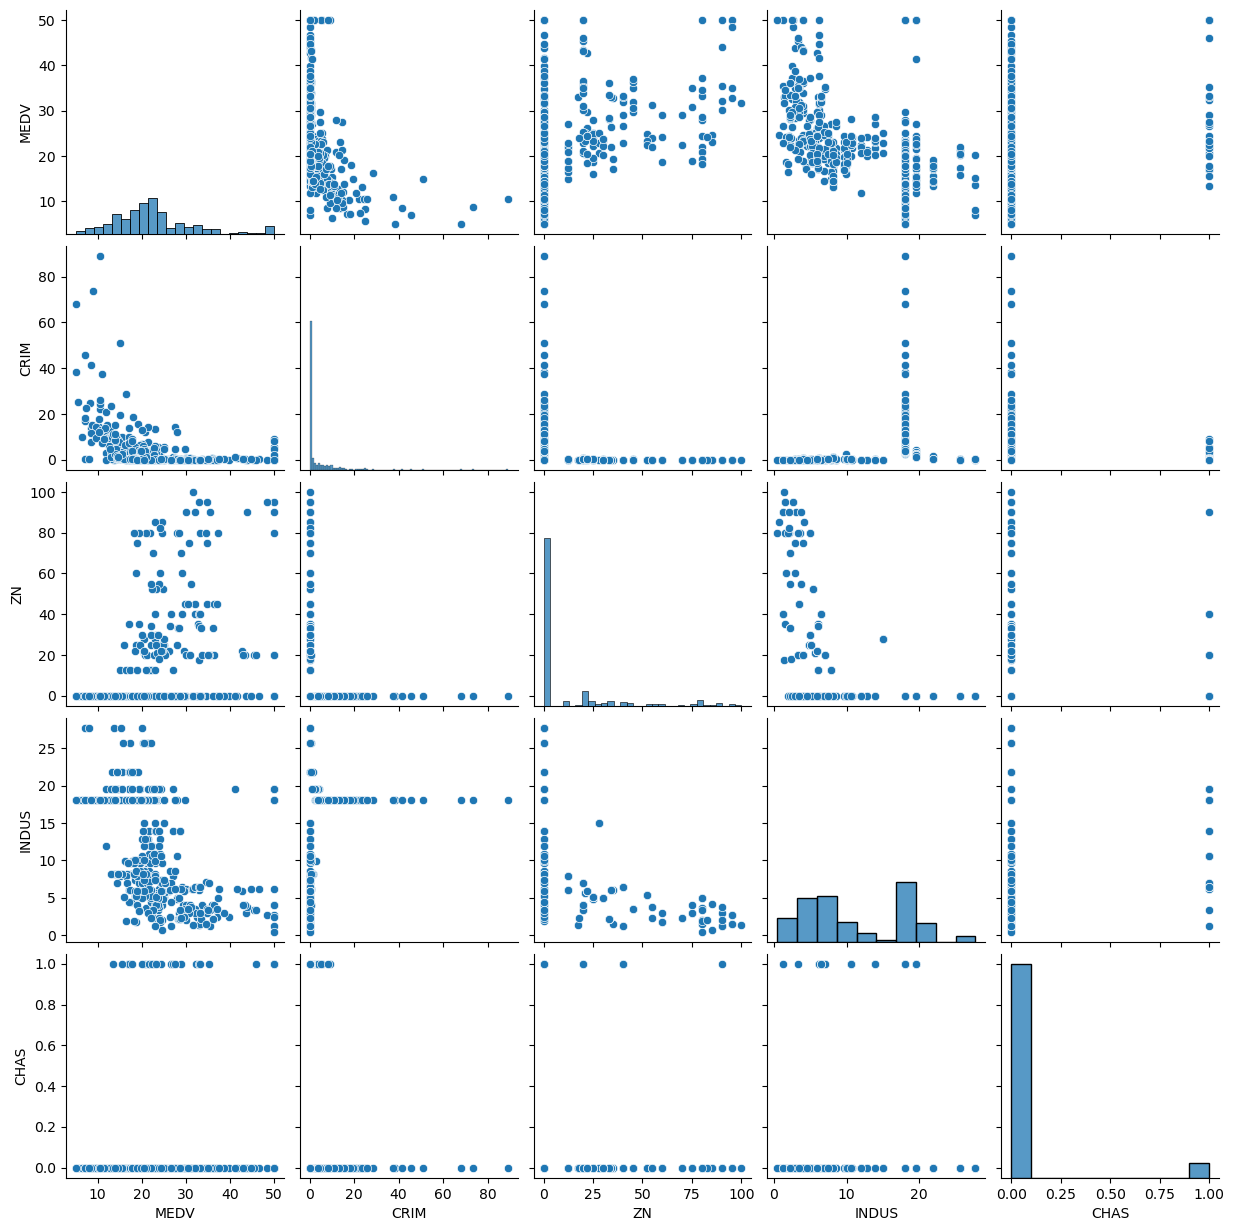

In [25]:
sns.pairplot(train[["MEDV", 'CRIM', 'ZN', 'INDUS', 'CHAS']], diag_kind="hist")
plt.show()

딱히 경향성을 보이지 않는다.

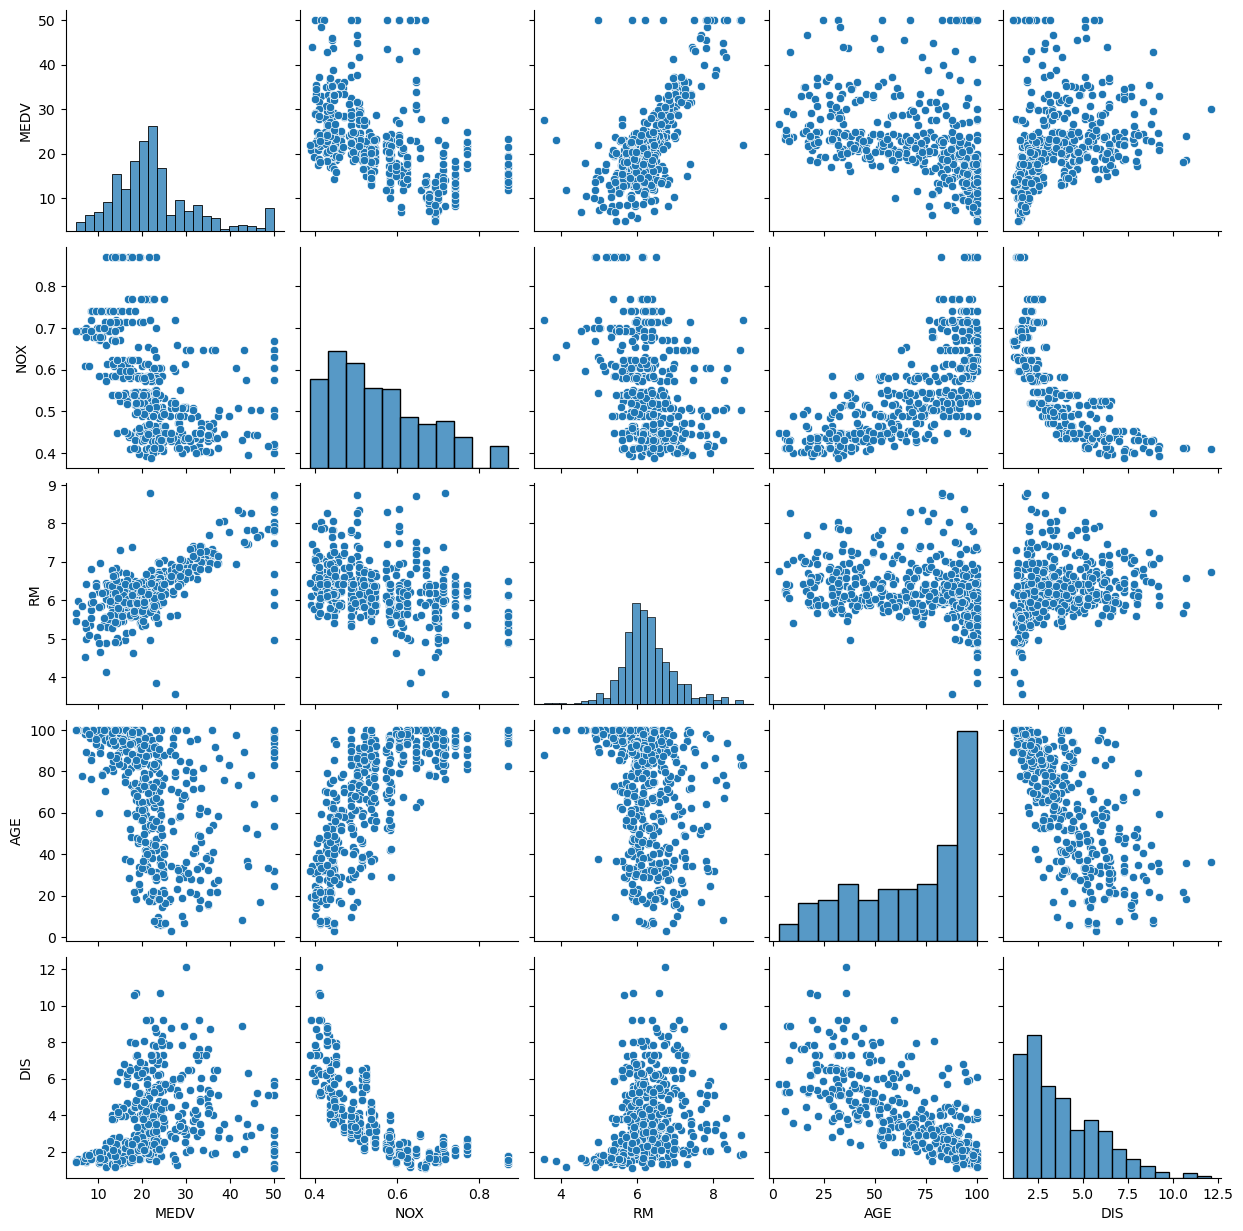

In [26]:
sns.pairplot(train[["MEDV", 'NOX', 'RM', 'AGE', 'DIS']], diag_kind="hist")
plt.show()

* 주택당 평균 방의 개수가 증가할수록, 보스턴 집값 평균이 증가하는 경향성을 보인다. 또한 보스턴 집값 평균이 증가할수록, 주택당 평균 방의 개수가 증가하는 경향성을 보인다. (중요한 특징?)
* 일산화질소 농도가 높아질수록, 5개의 보스턴 고용 센터와의 거리가 가까워지는 경향성을 보인다. 또한, 5개의 보스턴 고용 센터와의 거리가 멀어질수록, 일산화질소 농도가 낮아지는 경향성을 보인다. (중요한 특징?)

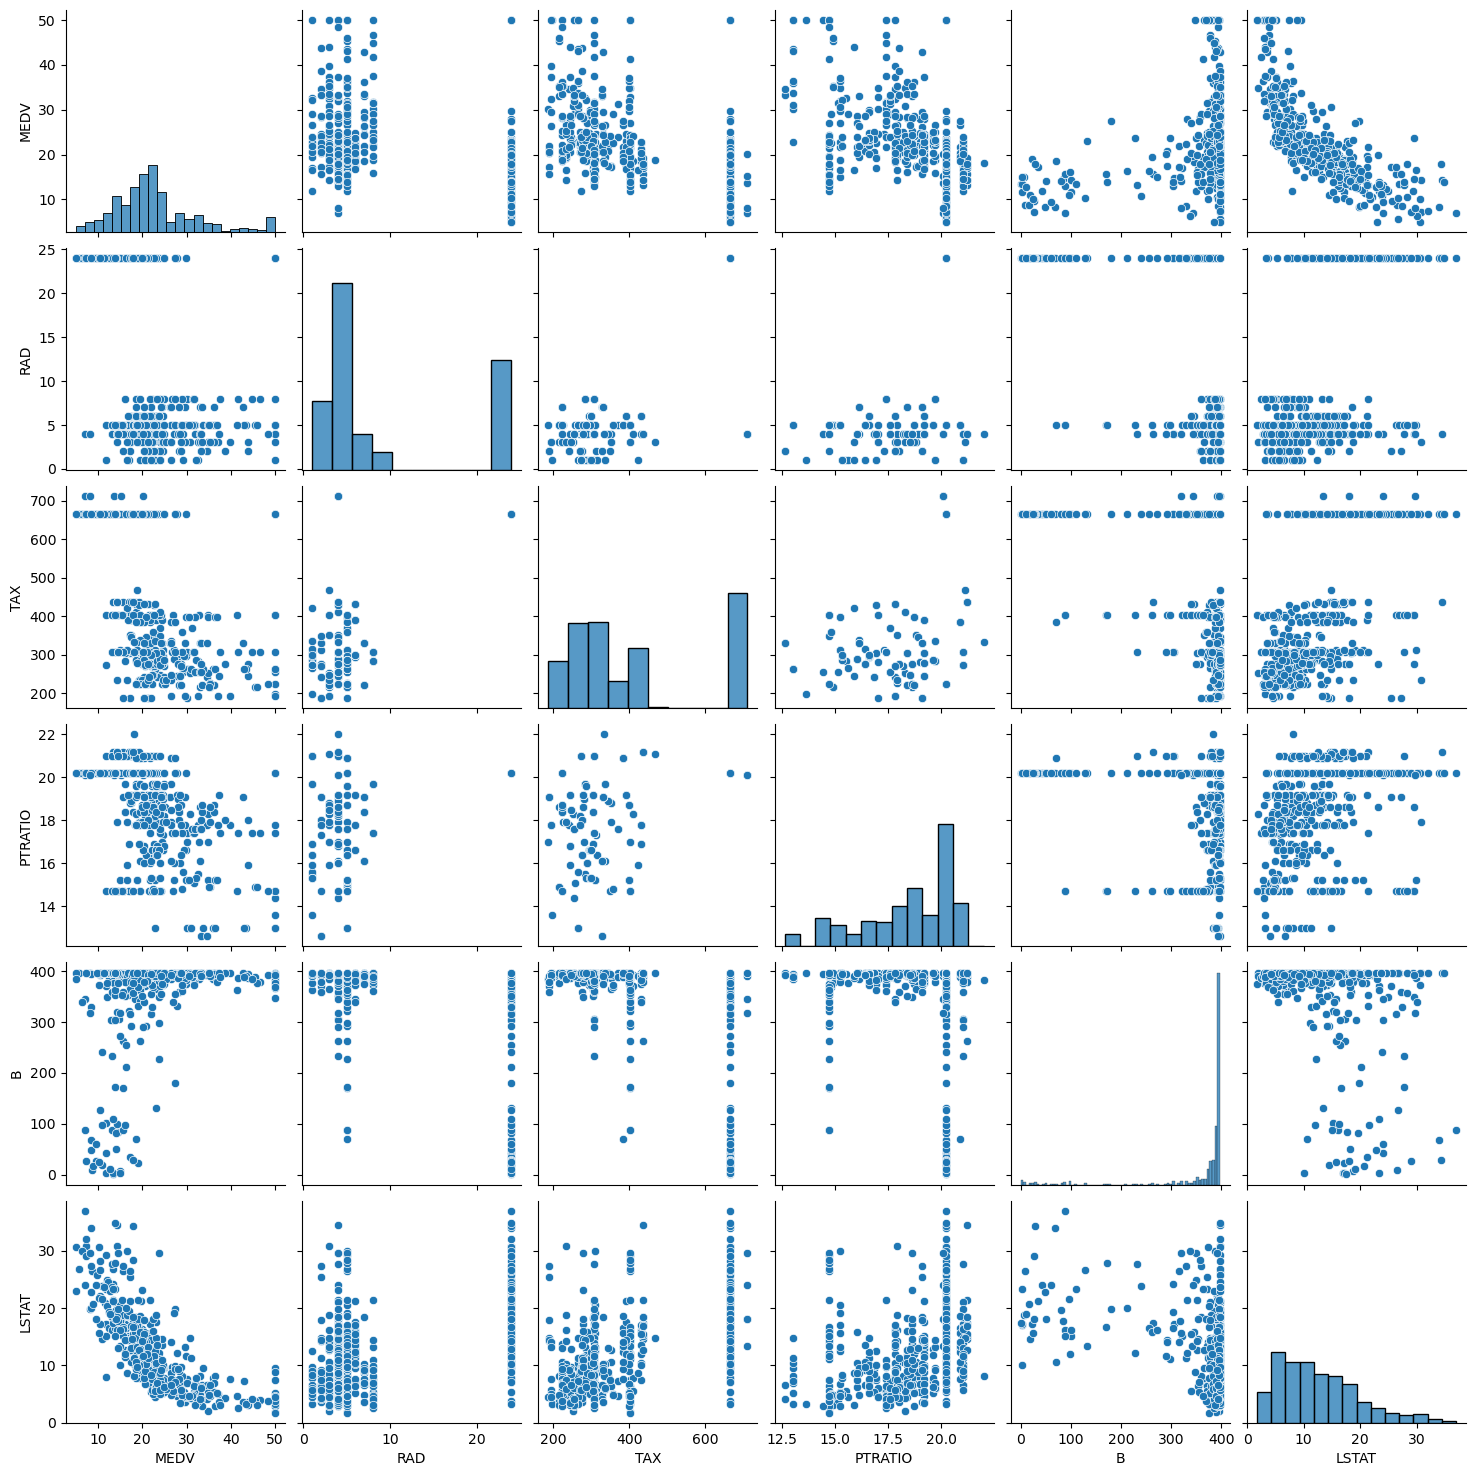

In [27]:
sns.pairplot(train[["MEDV", 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']], diag_kind="hist")
plt.show()

* 보스턴 집값이 감소할수록, 하위 계층의 비율이 높아지는 경향성을 보인다. 또한 하위 계층의 비율이 높아질수록, 보스턴 집값이 감소하는 경향성을 보인다. (중요한 특징?)

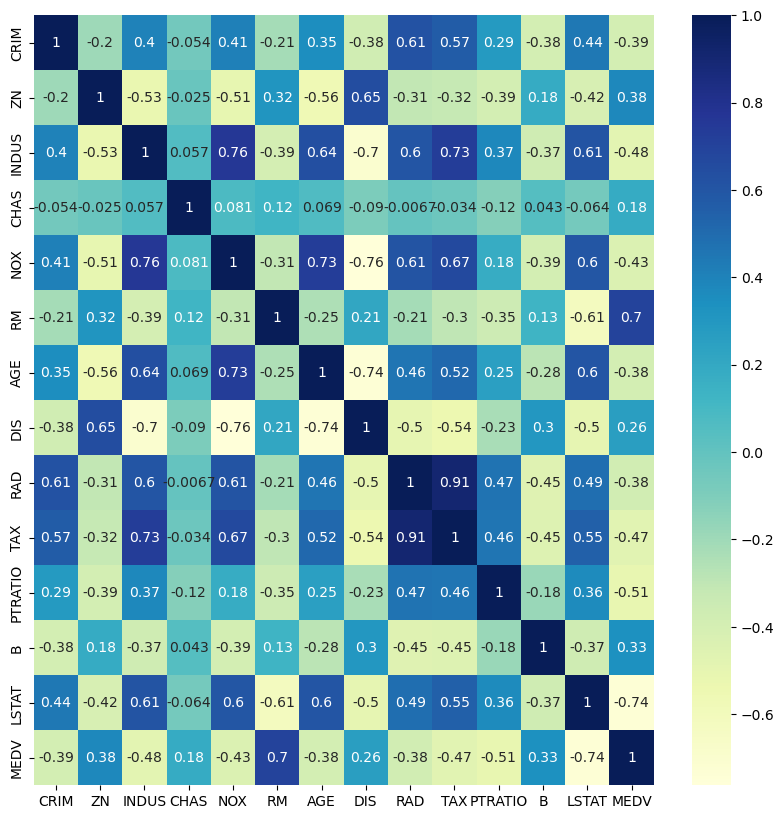

In [19]:
fig, ax=plt.subplots(1, 1, figsize=(10, 10))
_=sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")
plt.show()

절댓값 1에 가까울수록 상관관계가 크게 나타남을 알 수 있다. (방의 개수와 하위 계층 비율이 보스턴 집값 예측과 상관관계가 크게 있음을 알 수 있다.)

##  Model Compatibility

### ANOVA

* SST = SSE + SSR (SST 자유도 : n-1)
* SSE가 작을수록, Y를 잘 예측한다는 의미이다. (자유도 : n-2)
* SSR이 클수록, Y를 잘 예측한다는 의미이다. (자유도 : 1)
* MSR = SSR / 1
* MSE = SSE / n-2

y는 1개, x가 여러 개이기 때문에, 다중회귀분석이다.

참고 블로그 : [다중회귀분석 실습](https://todayisbetterthanyesterday.tistory.com/7)

In [33]:
train_constant=sm.add_constant(X, has_constant="add") # 상수항 b0 추가하기.

In [37]:
# OLS 검정하기.
multi_model=sm.OLS(y, train_constant)
fitted_multi_model=multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     97.64
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          9.18e-121
Time:                        00:20:10   Log-Likelihood:                -1342.6
No. Observations:                 455   AIC:                             2713.
Df Residuals:                     441   BIC:                             2771.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.6210      5.327      6.874      0.000      26.151      47.091
CRIM          -0.1105      0.033     -3.374      0.001      -0.175      -0.046
ZN             0.0455      0.014      3.194      0.002       0.018       0.074
INDUS          0.0495      0.064      0.770      0.442      -0.077       0.176
CHAS           2.4724      0.919      2.690      0.007       0.666       4.279
NOX          -17.8706      3.931     -4.546      0.000     -25.597     -10.144
RM             3.8354      0.436      8.806      0.000       2.979       4.691
AGE            0.0018      0.014      0.130      0.897      -0.025       0.029
DIS           -1.3702      0.205     -6.683      0.000      -1.773      -0.967
RAD            0.3048      0.068      4.462      0.000       0.171       0.439
TAX           -0.0120      0.004     -3.088      0.002      -0.020      -0.004
PTRATIO       -1.0090      0.138     -7.331      0.000      -1.279      -0.738
B              0.0089      0.003      3.210      0.001       0.003       0.014
LSTAT         -0.5208      0.053     -9.836      0.000      -0.625      -0.417
==============================================================================
Omnibus:                      177.556   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              897.029
Skew:                           1.636   Prob(JB):                    1.63e-195
Kurtosis:                       9.051   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Data Pre-processing

### StandardScaler

분석 시 변수들의 스케일이 다른 경우 컬럼 별 단위 또는 범위를 통일시켜주기 위해 표준화를 해줍니다.

표준화란 데이터 값들을 평균이 0이고 분산이 1인 정규 분포로 만드는 것입니다.


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaler = scaler.fit_transform(train[train.columns[1:-1]])
test_scaler = scaler.transform(test)

## Modeling
### Model Hyperparameter Setting

대부분의 모델들은 사람이 직접 설정할 수 있는 Hyperparameter를 가지고 있습니다.  

이런 Hyperparameter에 어떤 값이 설정되는가에 따라 모델의 성능은 크게 차이나게 됩니다. 

본 Baseline에서 제공한 Ridge Regression 모델에서는 alpha를 Hyperparameter로 제공했습니다.  

alpha는 모델의 규제항으로, 모델의 오버피팅을 방지하는 역할을 합니다.

In [10]:
model = Ridge(alpha=1.0) #alpha의 값을 바꿔 규제 정도를 조절할 수 있습니다.

### Model Fit

In [11]:
model.fit(train_scaler, train['MEDV']) 

Ridge()

### Model Prediction

In [12]:
pred = model.predict(test_scaler)

## Submit

In [13]:
submit = pd.read_csv('./sample_submission.csv')

In [14]:
submit['MEDV'] = pred
submit.head()

,ID,MEDV
0,TEST_000,24.815935
1,TEST_001,34.300539
2,TEST_002,19.545297
3,TEST_003,24.371547
4,TEST_004,25.765769


In [15]:
submit.to_csv('./submit.csv', index=False)